<a href="https://colab.research.google.com/github/Sumitjh26997/CSS581-ML/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1. Given the Porto Seguro dataset from Kaggle, the goal is to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. In this task, you will predict the probability that an auto insurance policy holder files a claim. Here is the description of the data from the source:**

**In the train and test data,**
- **features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc).**
- **In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features.**
- **Features without these designations are either continuous or ordinal.**
- **Values of -1 indicate that the feature was missing from the observation.**
- **The target columns signifies whether or not a claim was filed for that policy holder.**

**The target class is imbalanced so you will need to use techniques for handling imbalanced data. Build the following classifiers (i) Logistic Regression (ii) Naïve Bayes (iii) Random Forest (with the bullet point setting below) (iv) Balanced Random Forest (https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html)

(v) AdaBoost with random undersampling (https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.RUSBoostClassifier.htmlLinks to an external site.)

(vi) Gradient Boost classifier



You can use the imblearn in Python for resampling techniques.  

Report your performance on Precision, Recall, F-Score, AUC when using

No rebalancing techniques
Random Sampling to balance classes via under-sampling
Random Sampling to balance classes via over-sampling
Undersampling: TomekLinks
Oversampling: SMOTE**

In [1]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import StratifiedKFold,GridSearchCV
import missingno as mssno

# Read Data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Number rows and columns:', train.shape)
print('Number rows and columns:', test.shape)

Number rows and columns: (595212, 59)
Number rows and columns: (892816, 58)


# EDA


In [4]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,595212.0,743803.558435,429367.820429,7.000000,371991.500000,743547.500000,1.115549e+06,1.488027e+06
target,595212.0,0.036448,0.187401,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00
ps_ind_02_cat,595212.0,1.358943,0.664594,-1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01
ps_ind_04_cat,595212.0,0.416794,0.493311,-1.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_05_cat,595212.0,0.405188,1.350642,-1.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
ps_ind_06_bin,595212.0,0.393742,0.488579,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_07_bin,595212.0,0.257033,0.436998,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_08_bin,595212.0,0.163921,0.370205,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00


In [9]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,892816.0,744153.461357,429682.969773,0.000000,372021.750000,744307.000000,1.116308e+06,1.488026e+06
ps_ind_01,892816.0,1.902371,1.986503,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00
ps_ind_02_cat,892816.0,1.358613,0.663002,-1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00
ps_ind_03,892816.0,4.413734,2.700149,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01
ps_ind_04_cat,892816.0,0.417361,0.493453,-1.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_05_cat,892816.0,0.408132,1.355068,-1.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
ps_ind_06_bin,892816.0,0.393246,0.488471,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_07_bin,892816.0,0.257191,0.437086,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_08_bin,892816.0,0.163659,0.369966,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
ps_ind_09_bin,892816.0,0.185905,0.389030,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00


Seperate target variable

In [5]:
X_train, y_train = train.drop('target', axis=1), train['target']

In [7]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [8]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [11]:
train.duplicated().sum()

0

In [15]:
missing_vars = {}

for col in train.columns:
  missing_values = train[train[col] == -1][col].count()
  if missing_values > 0:
    missing_vars.update({col: missing_values})
    missing_value_percent = missing_values/train.shape[0]
    print('Variable {} has {} records ({:.2%}) with missing values'.format(col, missing_values, missing_value_percent))

print('In total, there are {} variables with missing values'.format(len(missing_vars)))

Variable ps_ind_02_cat has 216 records (0.04%) with missing values
Variable ps_ind_04_cat has 83 records (0.01%) with missing values
Variable ps_ind_05_cat has 5809 records (0.98%) with missing values
Variable ps_reg_03 has 107772 records (18.11%) with missing values
Variable ps_car_01_cat has 107 records (0.02%) with missing values
Variable ps_car_02_cat has 5 records (0.00%) with missing values
Variable ps_car_03_cat has 411231 records (69.09%) with missing values
Variable ps_car_05_cat has 266551 records (44.78%) with missing values
Variable ps_car_07_cat has 11489 records (1.93%) with missing values
Variable ps_car_09_cat has 569 records (0.10%) with missing values
Variable ps_car_11 has 5 records (0.00%) with missing values
Variable ps_car_12 has 1 records (0.00%) with missing values
Variable ps_car_14 has 42620 records (7.16%) with missing values
In total, there are 13 variables with missing values


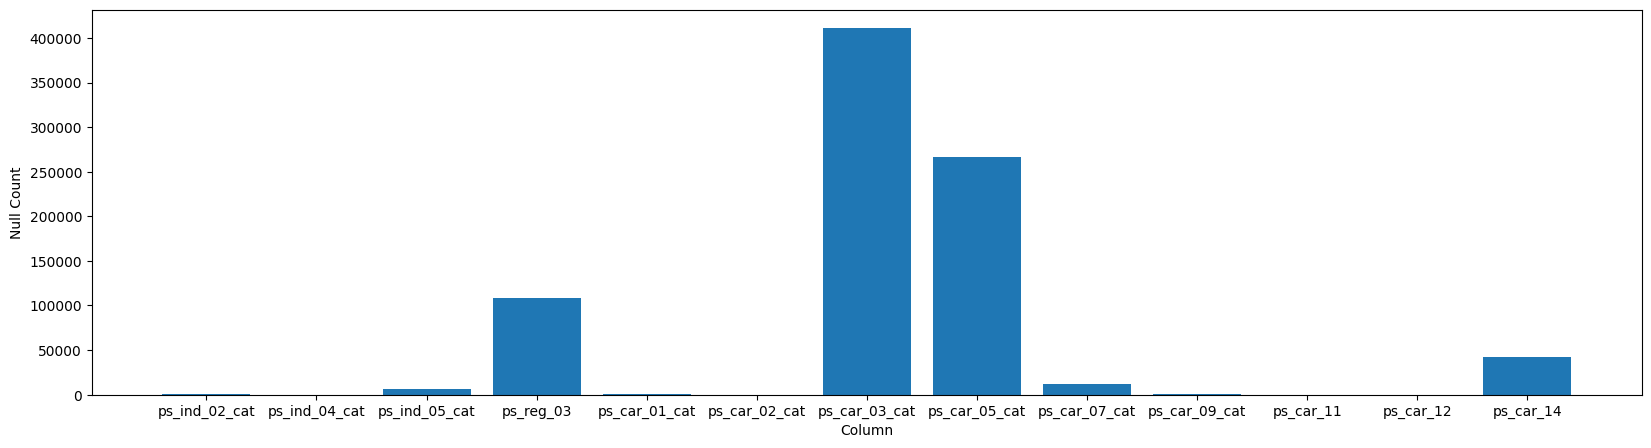

In [20]:
plt.figure(figsize=(20,5))
# Create a bar plot
plt.bar(missing_vars.keys(), missing_vars.values())

# Set the x-axis and y-axis labels
plt.xlabel('Column')
plt.ylabel('Null Count')

# Show the plot
plt.show()

- **ps_car_03_cat** and **ps_car_05_cat** have a large proportion of records with missing values. These variables can be dropped.


<Axes: >

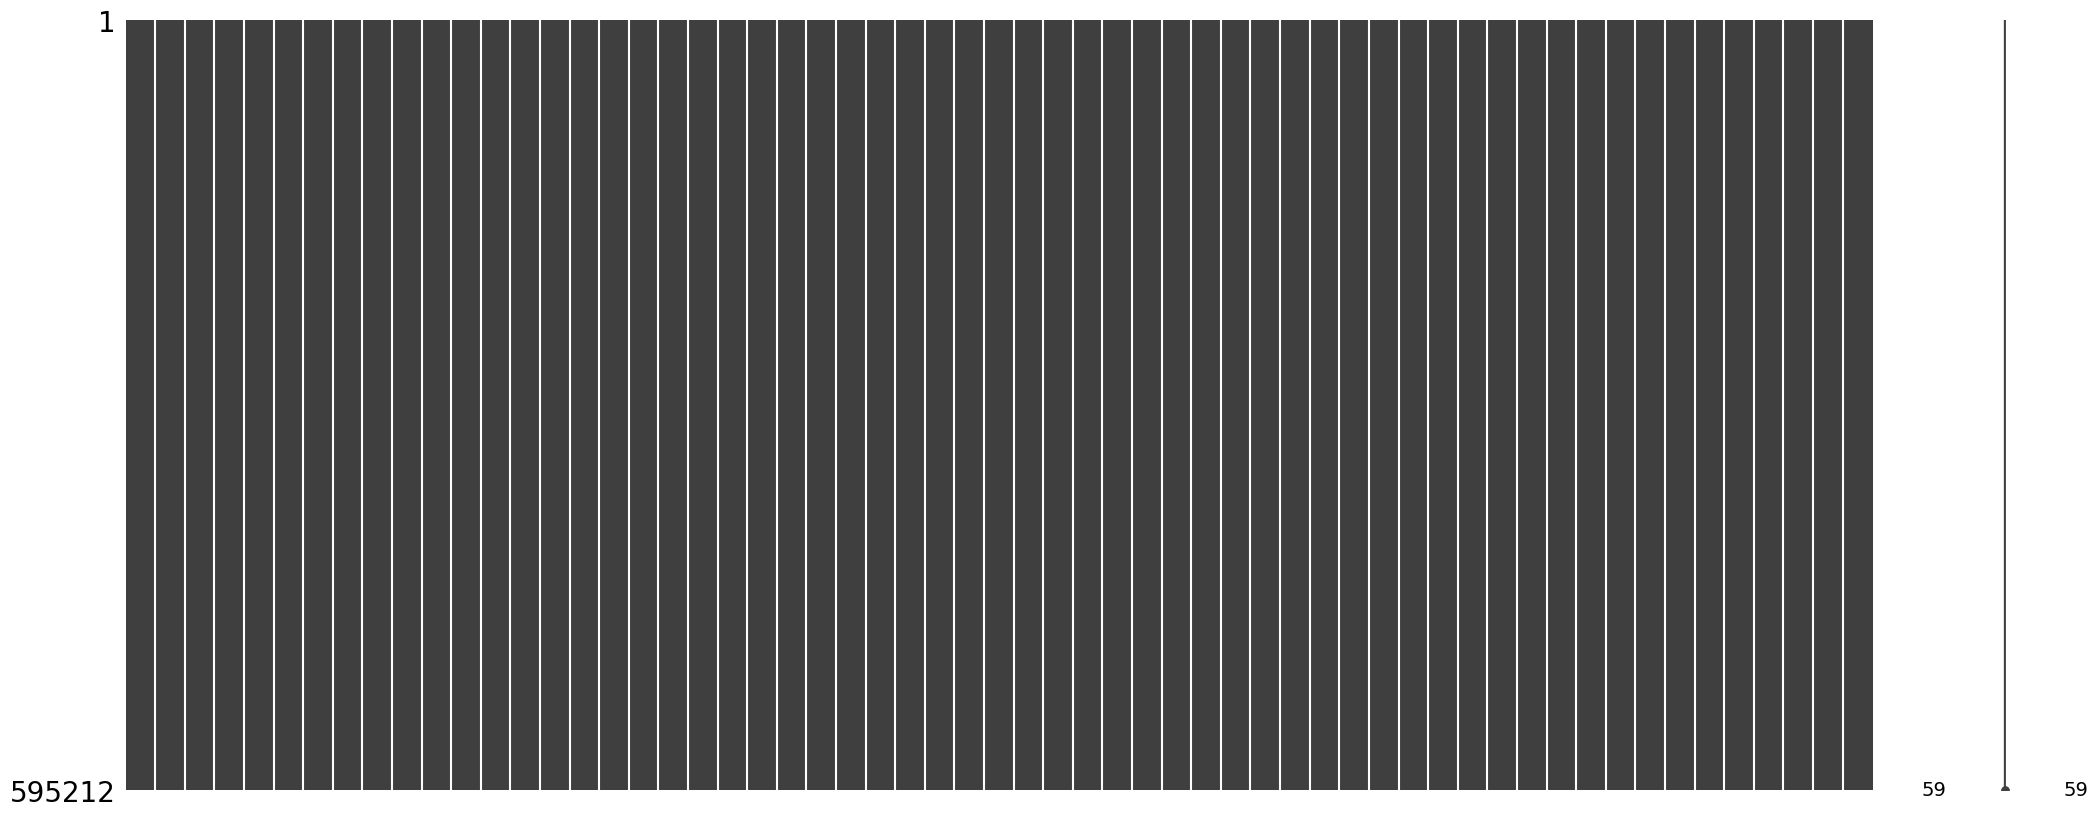

In [13]:
mssno.matrix(train)